In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
import os

In [7]:
data = pd.read_csv("./dataset/new/data.csv")

In [8]:
labels = pd.read_csv("./dataset/new/labels.csv")

In [9]:
data.drop(columns="Unnamed: 0", inplace=True)

# Task 3

Feature characteristics: How are the features distributed? Are there any pairs or
subsets of features that seem highly correlated or redundant?


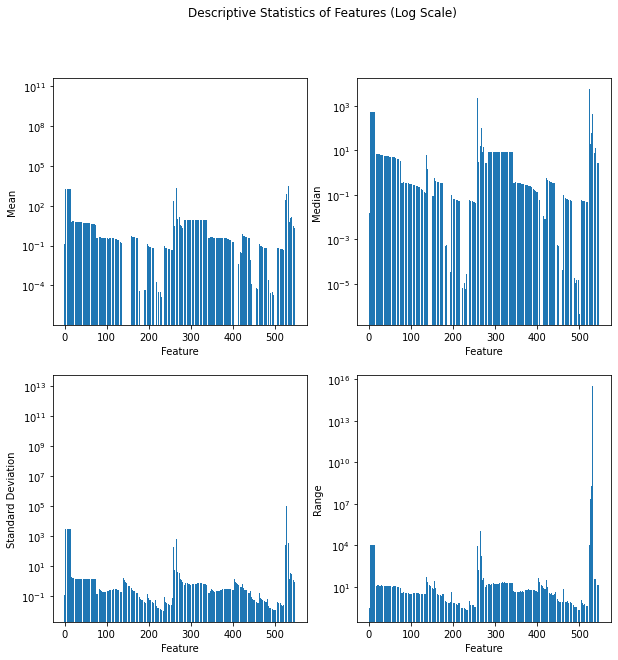

In [14]:
# calculate the descriptive statistics for each feature
stats = data.describe().T[['mean', '50%', 'std', 'min', 'max']]
stats['range'] = stats['max'] - stats['min']

# create a 2x2 plot grid for the four statistics
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

range_stats = np.arange(len(stats.to_numpy()))

# plot the mean in the top left subplot
ax[0, 0].bar(range_stats, stats['mean'])
ax[0, 0].set_xlabel("Feature")
ax[0, 0].set_ylabel("Mean")
ax[0, 0].set_yscale('log')

# plot the median in the top right subplot
ax[0, 1].bar(range_stats, stats['50%'])
ax[0, 1].set_xlabel("Feature")
ax[0, 1].set_ylabel("Median")
ax[0, 1].set_yscale('log')

# plot the standard deviation in the bottom left subplot
ax[1, 0].bar(range_stats, stats['std'])
ax[1, 0].set_xlabel("Feature")
ax[1, 0].set_ylabel("Standard Deviation")
ax[1, 0].set_yscale('log')

# plot the range in the bottom right subplot
ax[1, 1].bar(range_stats, stats['range'])
ax[1, 1].set_xlabel("Feature")
ax[1, 1].set_ylabel("Range")
ax[1, 1].set_yscale('log')

# set the title of the overall plot
fig.suptitle("Descriptive Statistics of Features (Log Scale)")

# show the plot
plt.show()

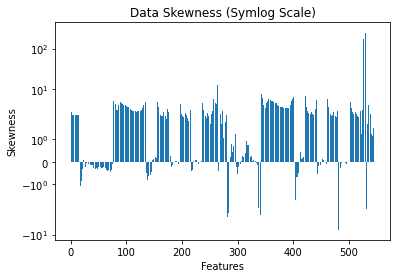

In [15]:
# Visualizing Skewness of Data to see which features have more outliers (uneven probability density function)
# High skewness means uneven distribution
skewness=data.skew()
skew_columns=skewness.to_numpy()

# create a bar plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(skew_columns)), skewness)

plt.title("Data Skewness (Symlog Scale)")
plt.xlabel("Features")
plt.ylabel("Skewness")
ax.set_yscale('symlog')

In [18]:
corr_matrix = data.corr()

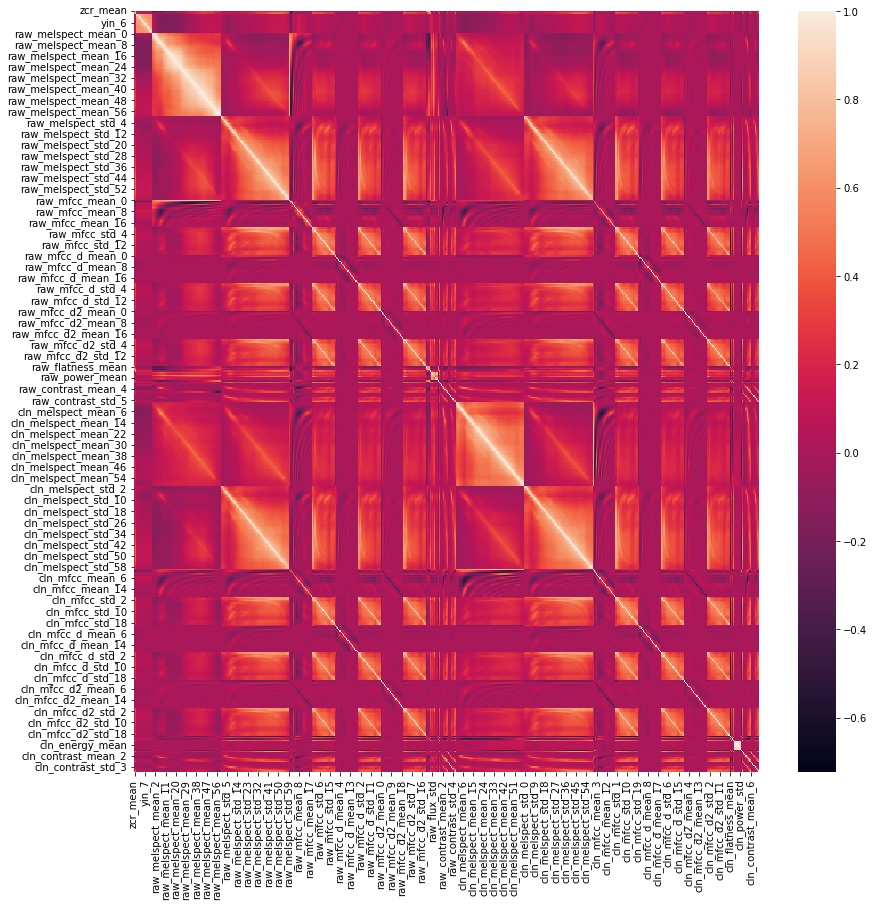

In [39]:
plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix)
plt.show()

In [42]:
raw_sub_matrix = data.drop(columns=[x for x in data.columns if x.startswith("cln")])
raw_corr = raw_sub_matrix.corr()
cln_sub_matrix = data.drop(columns=[x for x in data.columns if x.startswith("raw")])
cln_corr = cln_sub_matrix.corr()

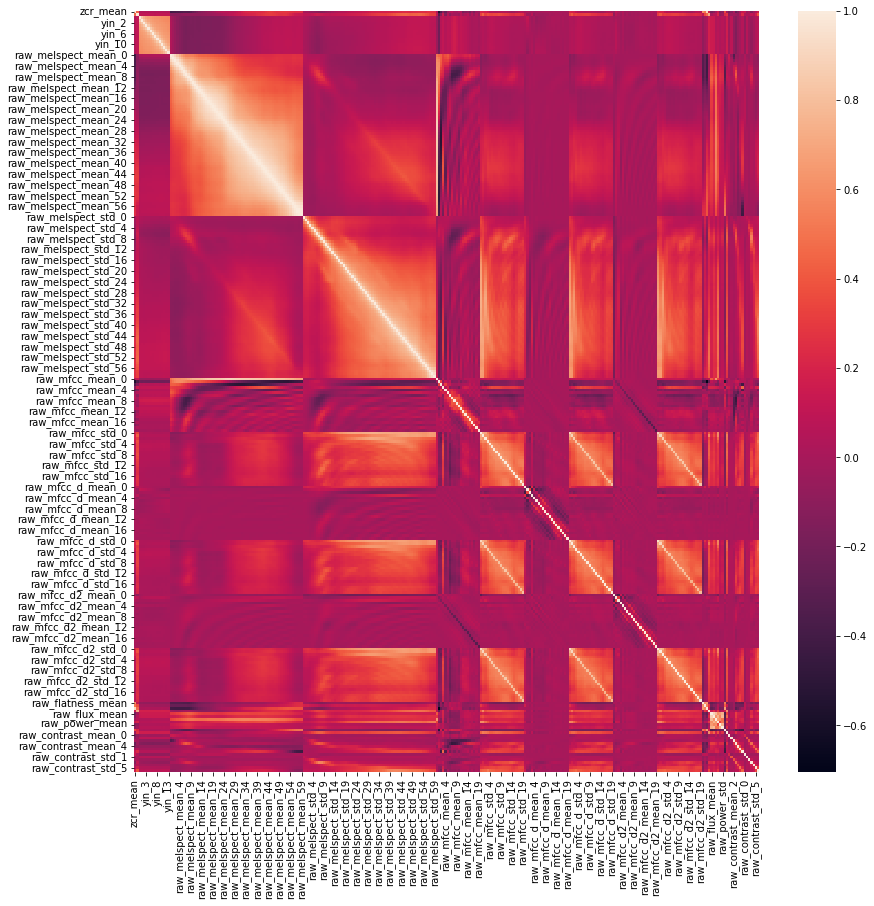

In [43]:
plt.figure(figsize=(14,14))
sns.heatmap(raw_corr)
plt.show()

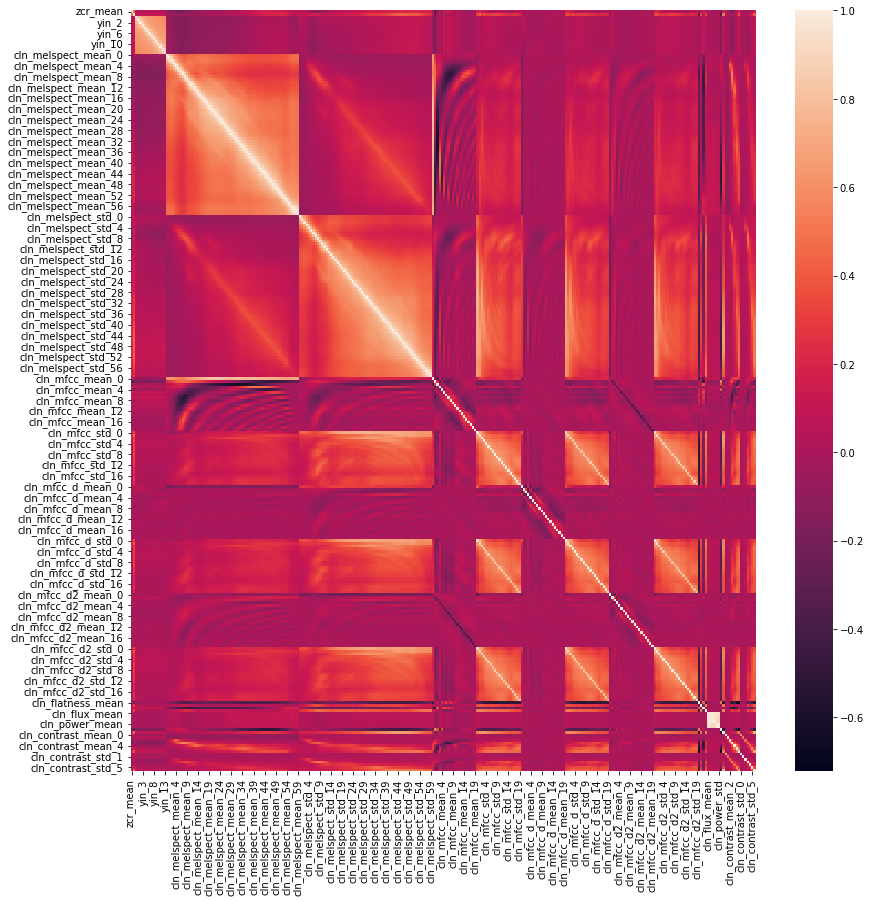

In [44]:
plt.figure(figsize=(14,14))
sns.heatmap(cln_corr)
plt.show()

# Task 4

Feature/Label agreement: Which features seem useful for classification? Which
ones are correlated with the labels?

In [9]:
from sklearn.feature_selection import mutual_info_classif

# Use mutual info method to get scores between real valued features and categorical labels
# The mutual information method measures the amount of information obtained from one variable about another variable.
# It measures the dependence between two variables by calculating the reduction in uncertainty 
# of one variable when the other variable is known.

In [10]:
# Create a function to visualize the mutual info scores for each feature
def create_mutual_vis(mutual_info):   
    # create a bar plot of mutual information scores
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(np.arange(len(mutual_info)), mutual_info)
    ax.set_title('Mutual Information Scores')
    ax.set_ylabel('Score')
    plt.xlabel('Features')
    plt.show()

In [22]:
mutual_info = mutual_info_classif(data.to_numpy(), labels["Aggregated"].to_numpy())

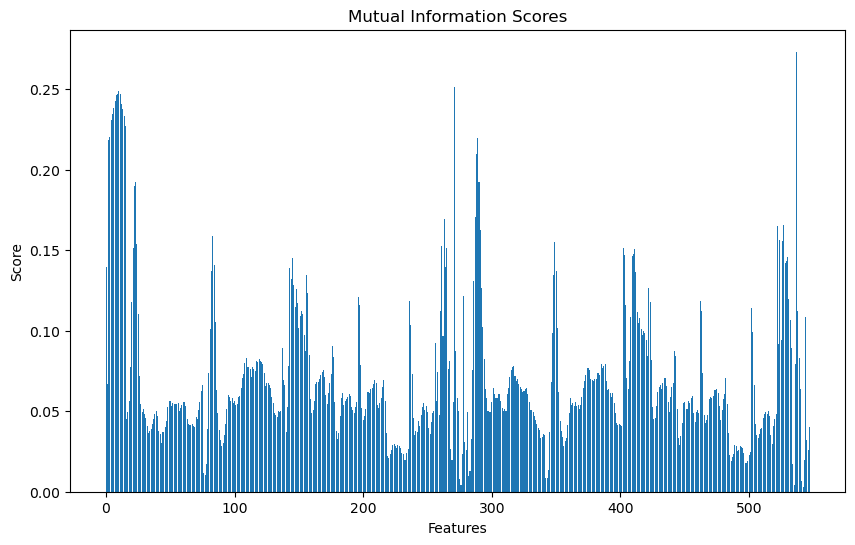

In [23]:
create_mutual_vis(mutual_info)

In [24]:
# Create binary labels instead of 0 ,1 ,2 .. to represent whether a bird exist or not to compute correlation
# between features and binary categorical labels later in this notebook
# Because correlation is only a linear relationship so it can't be used with the previous multi class labels
labels_binary = labels
labels_binary.loc[labels_binary["Aggregated"] != 0, "Aggregated"] = 1
labels_binary = labels_binary["Aggregated"]

In [25]:
# Again see/check whether the same features have high scores or not for whether a bird exists
mutual_info_binary = mutual_info_classif(data, labels_binary)

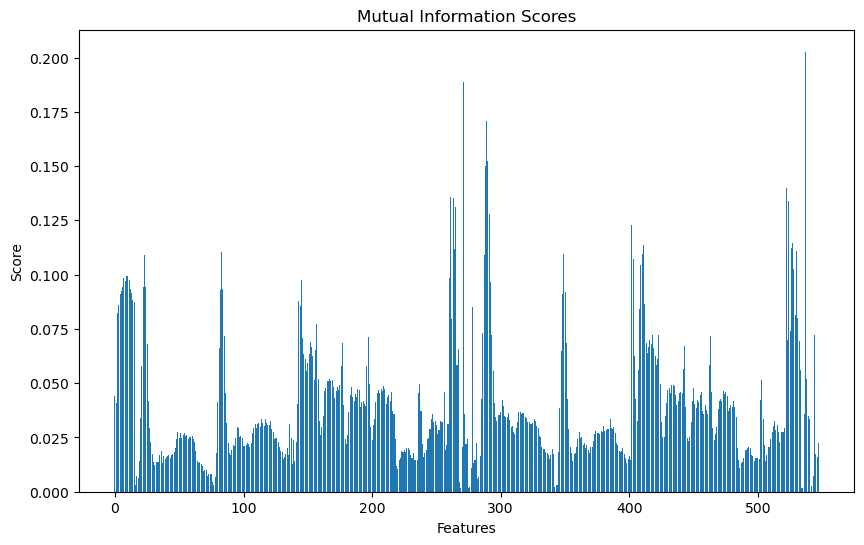

In [26]:
create_mutual_vis(mutual_info_binary)

In [27]:
# Compute the Pearson correlation between data and labels_binary (which states whether a bird exists or not -binary)
# Since we can not compute it for all classes as this would be categorical label column which doesn't work with correlation
corr_coef_binary = data.corrwith(labels_binary, method='pearson')

In [68]:
birds = np.array_split(data, 6)
labels_binary = np.array_split(labels, 6)

In [69]:
corr_coef_binary = []
for bird_idx in range(6):
    corr_coef_binary.append(birds[bird_idx].corrwith(labels_binary[bird_idx]["Aggregated"].replace(bird_idx + 1, 1),
                                                     method='pearson'))

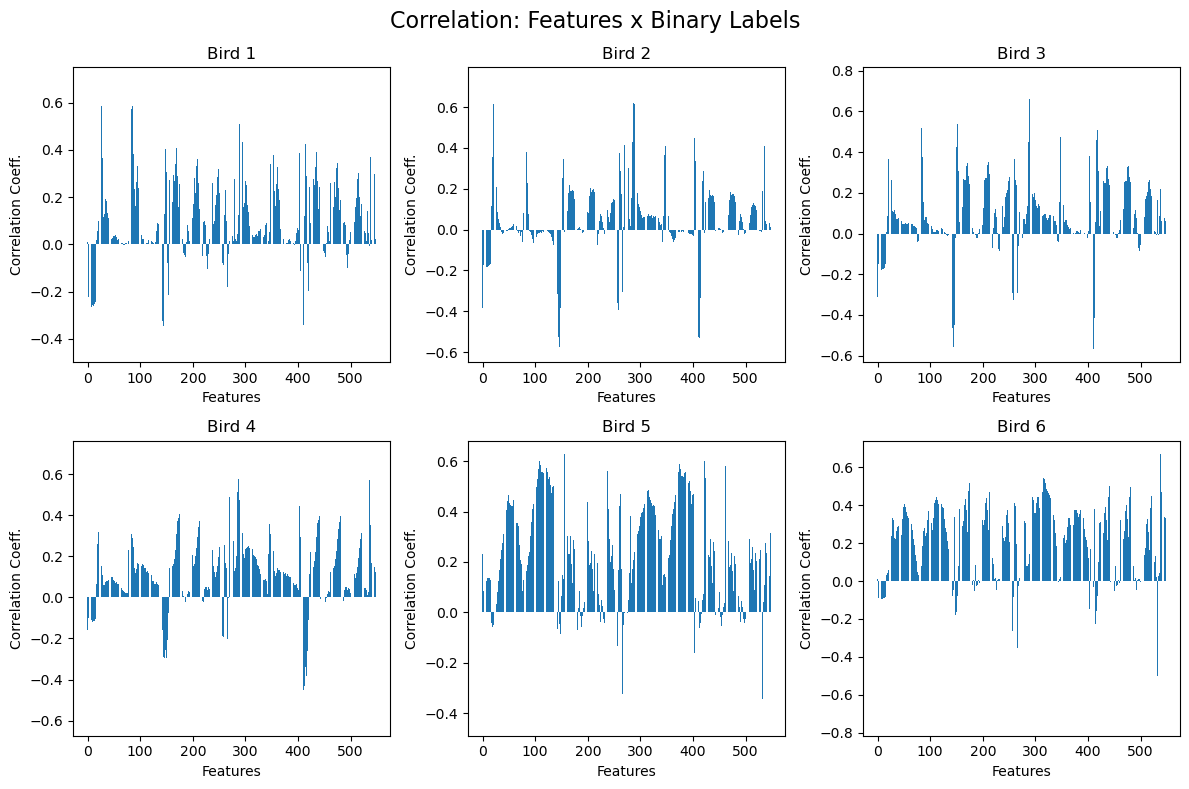

In [79]:
# Create a figure with 6 subplots arranged in a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Loop over the subplots and create a bar plot in each one
for bird_idx, ax in enumerate(axs.flat):
    ax.bar(np.arange(len(corr_coef_binary[bird_idx])), corr_coef_binary[bird_idx])
    ax.set_title(f"Bird {bird_idx+1}")
    ax.set_xlabel("Features")
    ax.set_ylabel("Correlation Coeff.")

# Add a main title and adjust the spacing
fig.suptitle("Correlation: Features x Binary Labels", fontsize=16)
fig.tight_layout()